atividade et

# Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [41]:
df = pd.read_csv("content/artificial1d.csv")
df.columns = ['x', 'y']
df.head()

,x,y
0,-0.931034,-1.326980
1,-0.862069,-1.105598
2,-0.793103,-0.873946
3,-0.724138,-0.285027
4,-0.655172,-0.431153


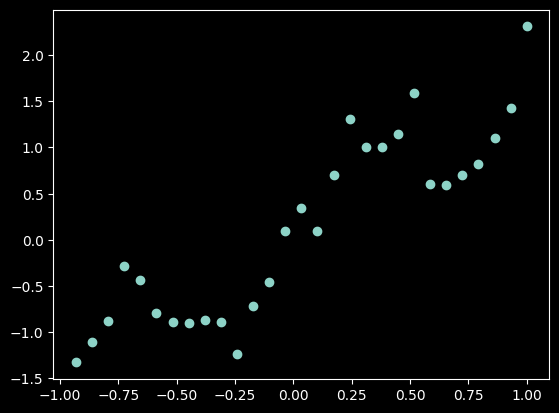

In [42]:
plt.scatter(df['x'], df['y'])
plt.show()

# Models

## Gradient Descent

In [43]:
class GradientDescent:
  def __init__(self, alpha = 0.1, epochs = 10):
    self.alpha = alpha
    self.epochs = epochs
    self.w0 = 0
    self.w1 = 0

  def fit(self, x, y, plot = False):
    error_list = []
    error_list_x = []
    for epoch in range(self.epochs):
      for i in range(len(x)):
        y_hat = self.w0 + self.w1 * x[i]
        error_list.append(y[i] - y_hat)
        error_list_x.append((y[i] - y_hat)* x[i])
      self.w0 = self.w0 + self.alpha * 1/len(x) * sum(error_list)
      self.w1 = self.w1 + self.alpha * 1/len(x) * sum(error_list_x)

      if plot:
        plot_x = [x.min(), x.max()]
        plot_y = [self.w0 + self.w1 * x for x in plot_x]
        plt.plot(plot_x, plot_y)
        plt.scatter(df['x'], df['y'])
        plt.show()
    return self.w0, self.w1

  def predict(self, x):
    return self.w0 + self.w1 * x

In [44]:
GD = GradientDescent()

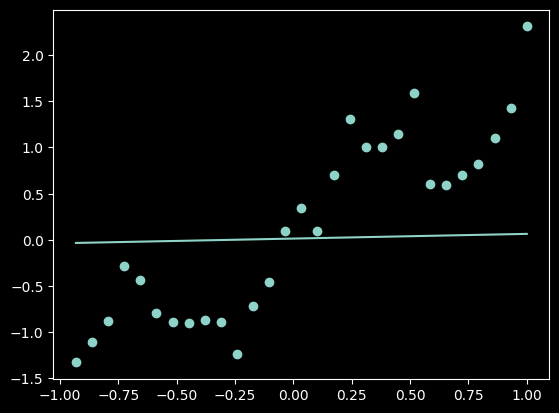

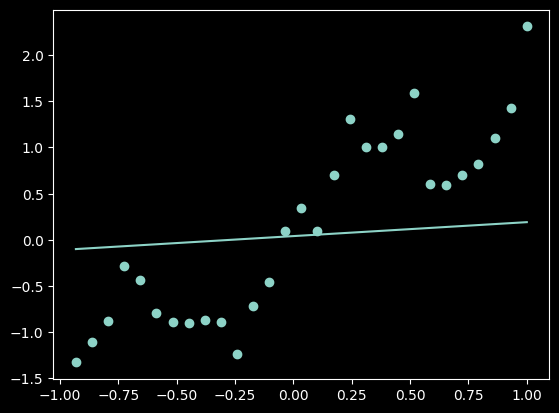

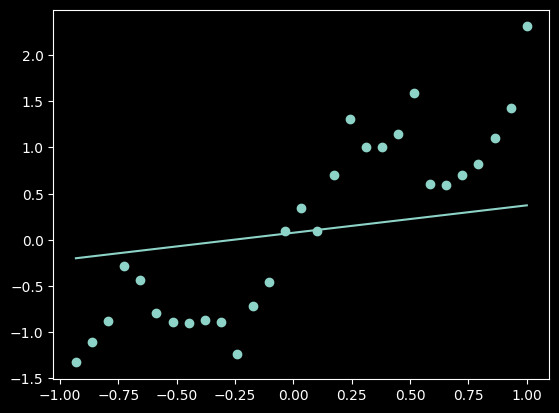

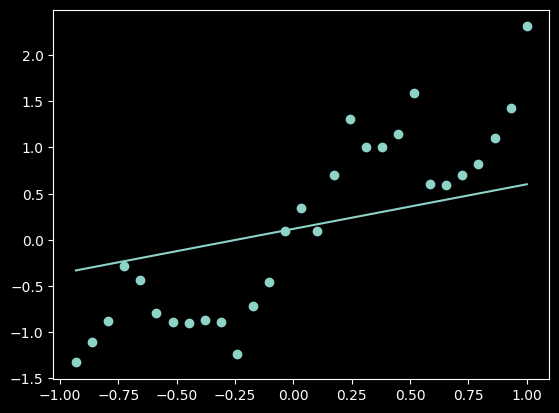

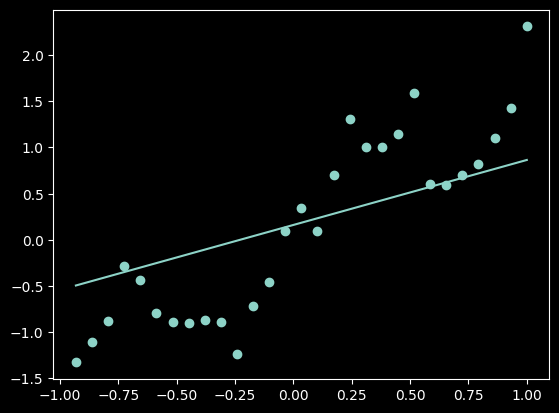

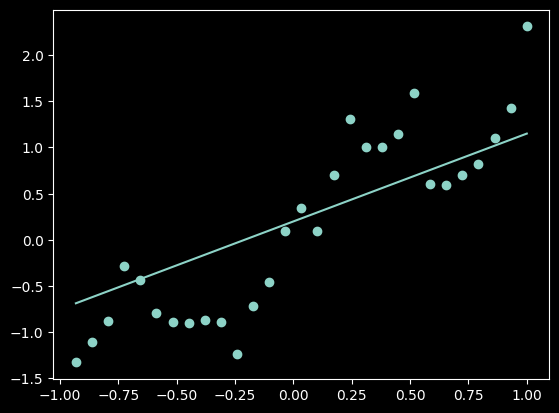

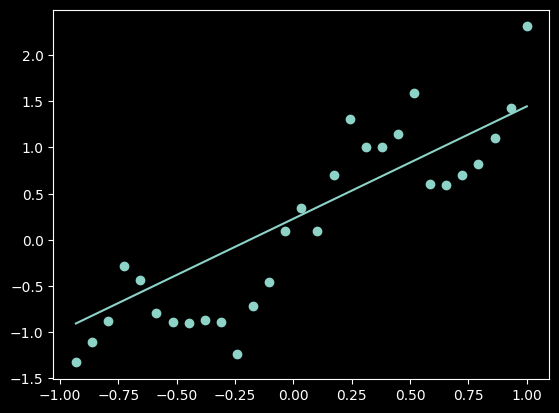

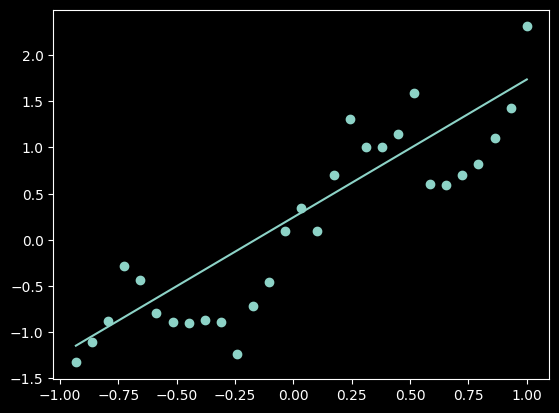

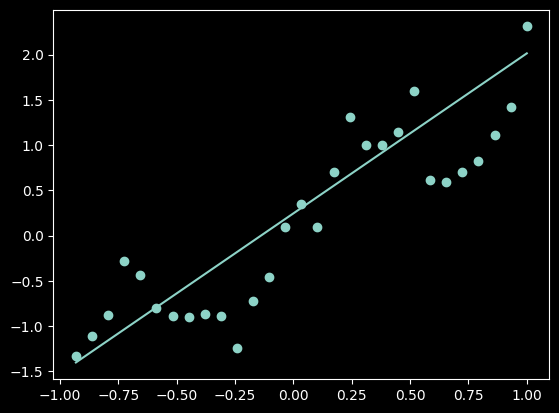

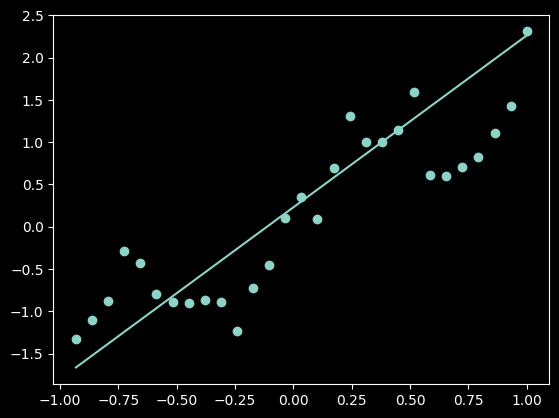

(np.float64(0.22926316528089008), np.float64(2.0343495755194283))

In [45]:
GD.fit(df['x'], df['y'], plot = True)

In [46]:
GD.fit(df['x'], df['y'])
pred = GD.predict(df['x'])

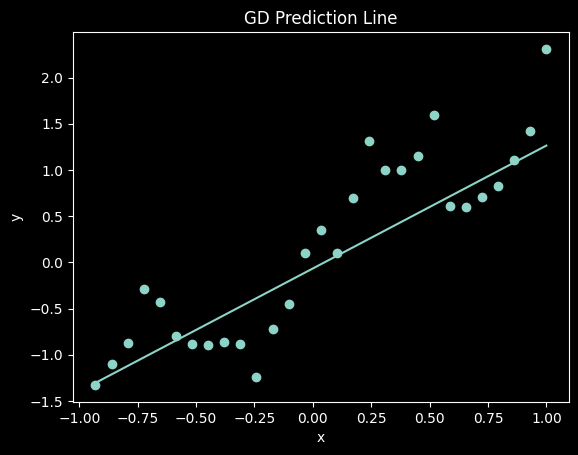

In [47]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GD Prediction Line')
plt.show()

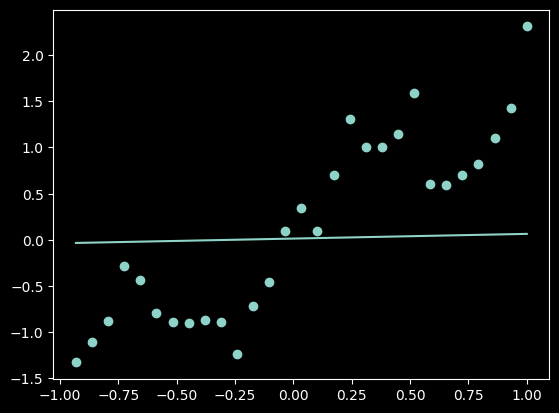

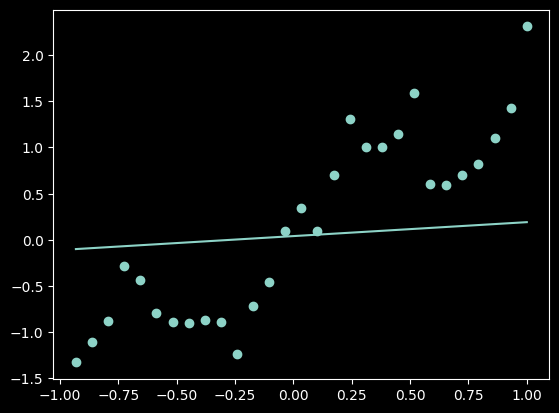

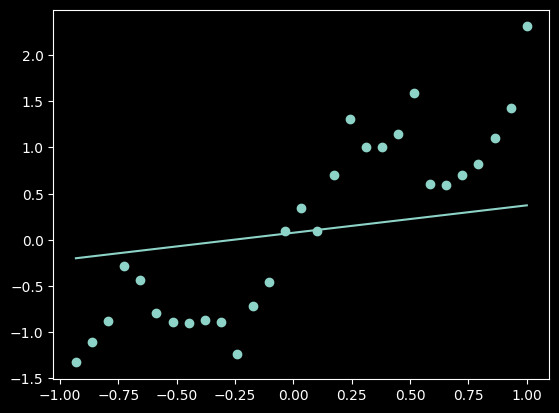

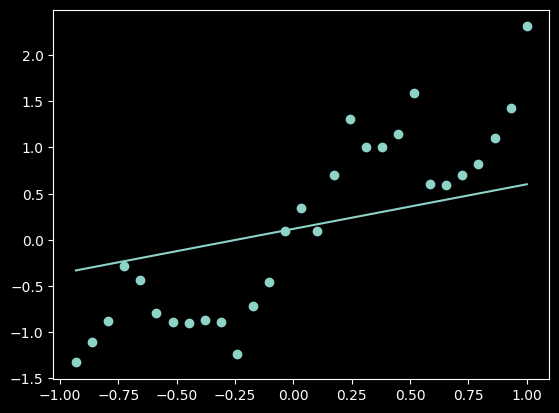

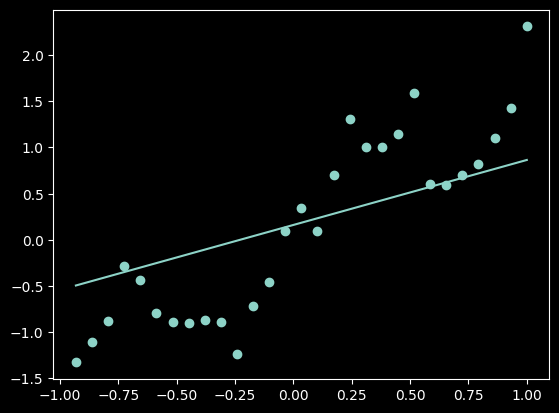

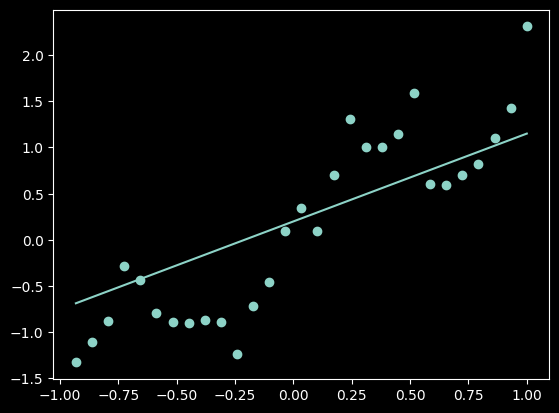

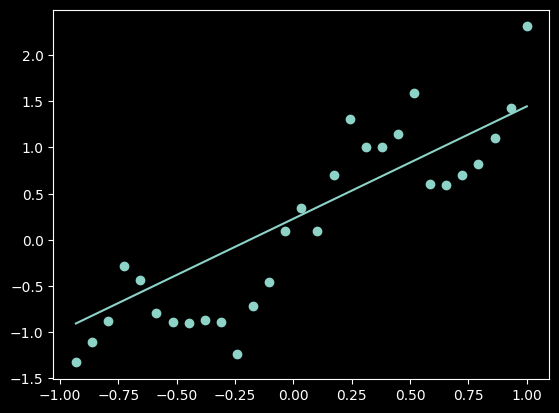

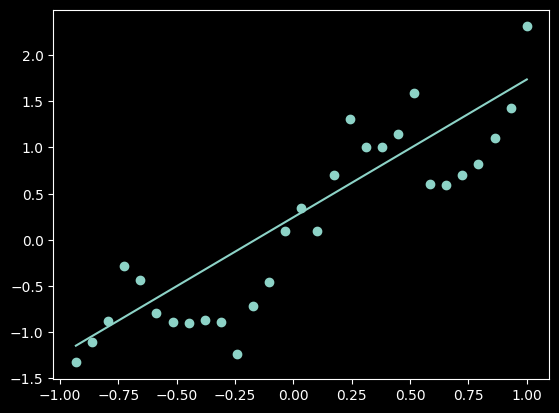

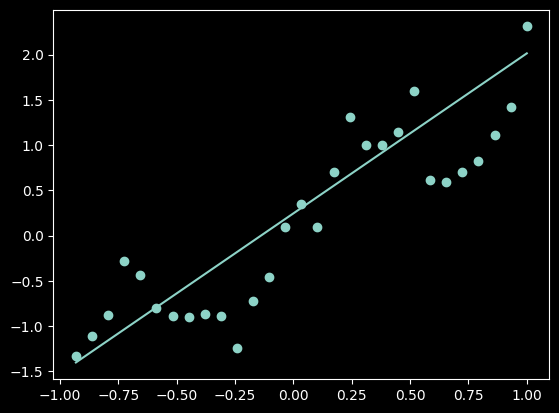

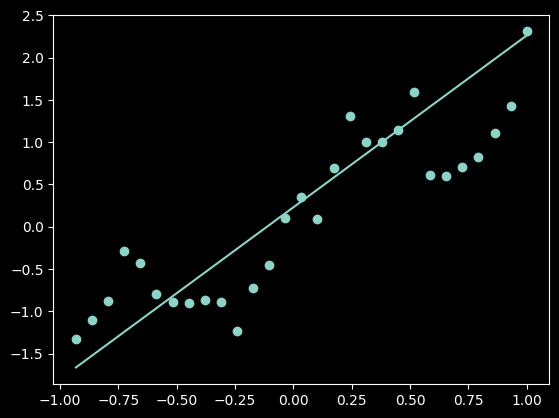

In [48]:
alpha = 0.1
epochs = 10

w0 = 0
w1 = 0

error_list = []
error_list_x = []
for epoch in range(epochs):
  for i in range(len(df)):
    x = df['x'][i]
    y = df['y'][i]

    y_hat = w0 + w1 * x
    error_list.append(y - y_hat)
    error_list_x.append((y - y_hat)* x)

  w0 = w0 + alpha * 1/len(df) * sum(error_list)
  w1 = w1 + alpha * 1/len(df) * sum(error_list_x)

  plot_x = [df['x'].min(), df['x'].max()]
  plot_y = [w0 + w1 * x for x in plot_x]
  plt.plot(plot_x, plot_y)

  plt.scatter(df['x'], df['y'])
  plt.show()

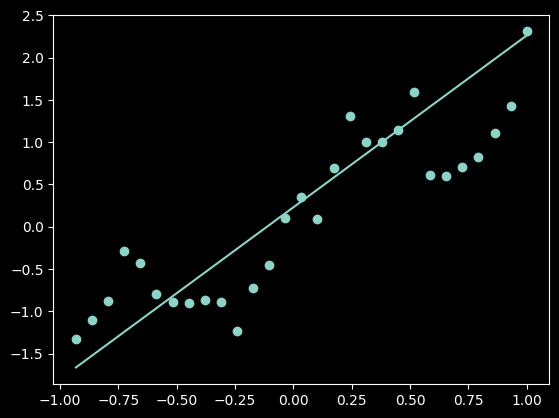

In [49]:
# final

plot_x = [df['x'].min(), df['x'].max()]
plot_y = [w0 + w1 * x for x in plot_x]

plt.scatter(df['x'], df['y'])
plt.plot(plot_x, plot_y)
plt.show()

Gradiente Descendente Estoc ́astico

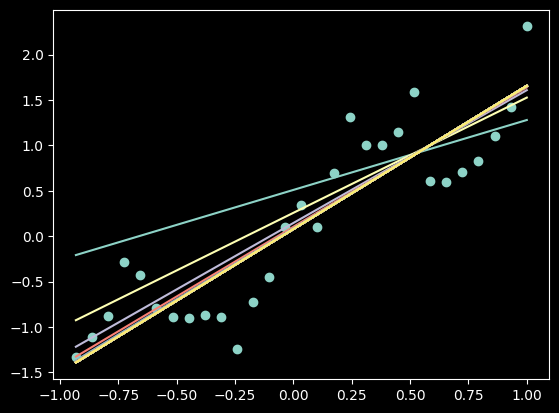

0.07880670220501336 1.5773058089903684


In [50]:
alpha = 0.1
epochs = 100

w0 = 0
w1 = 0

for epoch in range(epochs):
  for i in range(len(df)):
    x = df['x'][i]
    y = df['y'][i]

    y_hat = w0 + w1 * x
    error = y - y_hat

    w0 = w0 + alpha * error
    w1 = w1 + alpha * error * x
  plot_x = [df['x'].min(), df['x'].max()]
  plot_y = [w0 + w1 * x for x in plot_x]

  plt.plot(plot_x, plot_y)
plt.scatter(df['x'], df['y'])
plt.show()
print(w0, w1)


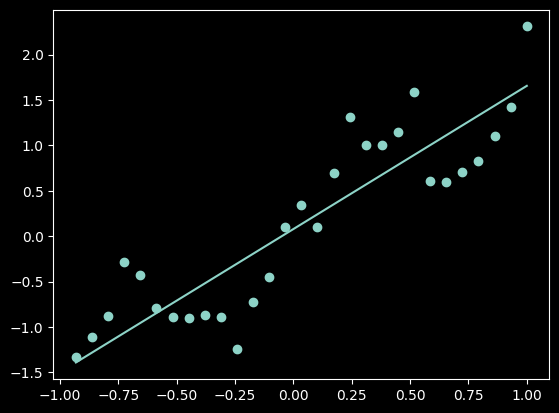

In [51]:
# final

plot_x = [df['x'].min(), df['x'].max()]
plot_y = [w0 + w1 * x for x in plot_x]

plt.scatter(df['x'], df['y'])
plt.plot(plot_x, plot_y)
plt.show()

Regressão Linear Analitica

In [52]:
X_data = pd.DataFrame({'x0': 1, 'x1': df['x']})
y_data = df['y']

X_data.head()

,x0,x1
0,1,-0.931034
1,1,-0.862069
2,1,-0.793103
3,1,-0.724138
4,1,-0.655172


In [53]:
X = X_data.values  # Converter X_data para uma matriz NumPy
y = y_data.values  # Converter y_data para uma matriz NumPy

In [54]:
XT = X.T  # Transpor X usando .T
w = np.linalg.inv(XT @ X) @ XT @ y  # Calcular w usando @ para multiplicação de matrizes e np.linalg.inv para inversa

In [55]:
print(w)

[0.08956111 1.51328267]


In [56]:
w[0]

np.float64(0.08956111478353075)

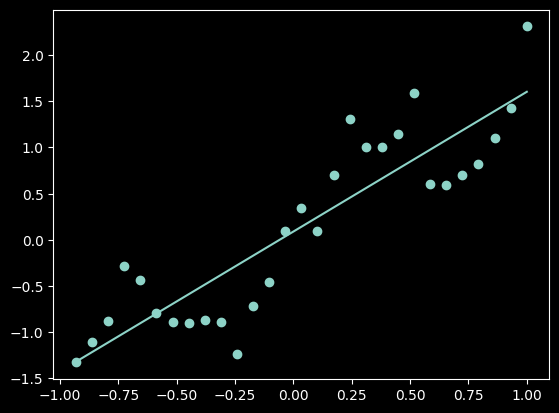

In [57]:
# final

plot_x = [df['x'].min(), df['x'].max()]
plot_y = [w[0] + w[1] * x for x in plot_x]

plt.scatter(df['x'], df['y'])
plt.plot(plot_x, plot_y)
plt.show()